In [1]:
import numpy as np
loadPath = "D:/AMEP Lab/BBot Database/output/data/bot2run4"

In [2]:
# Load Once, Happy Forever
center = np.load(loadPath+'/center.npy')
angle = np.load(loadPath + '/angle.npy')
sizes = np.load(loadPath + '/size.npy')

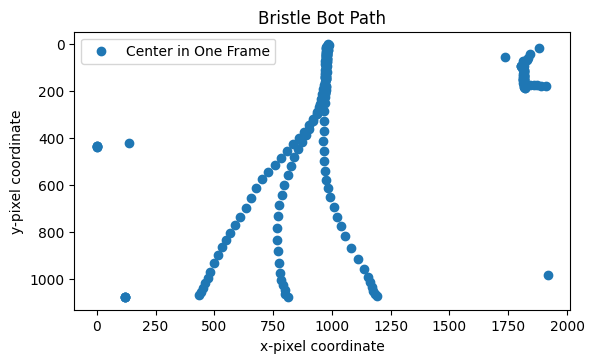

In [3]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.scatter([c[0] for c in center if c[0]!=-1], [c[1] for c in center if c[1]!=-1], label='Center in One Frame')
ax.set_aspect('equal', adjustable='box')
plt.title('Bristle Bot Path')
ax.invert_yaxis()
plt.xlabel('x-pixel coordinate')
plt.ylabel('y-pixel coordinate')
plt.legend()

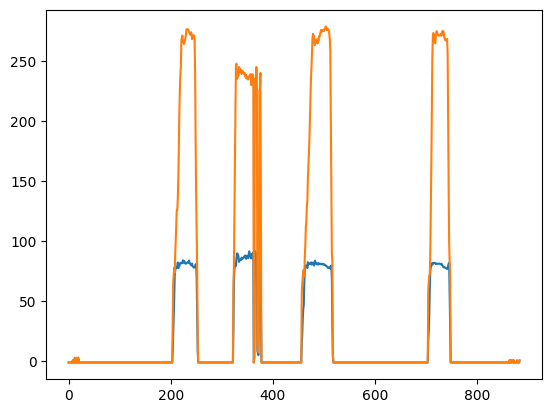

In [4]:
plt.plot([s[0] for s in sizes])
plt.plot([s[1] for s in sizes])
robotFull = np.array([s[1] for s in sizes]) >= 250

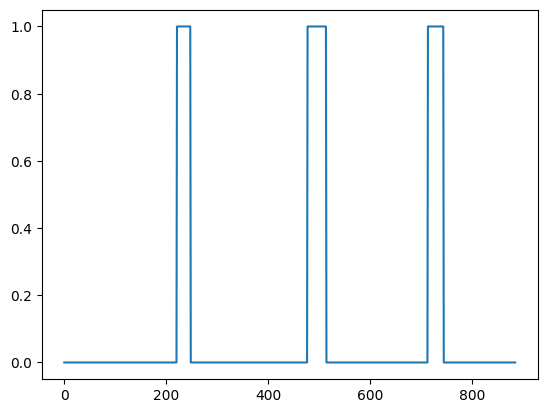

In [5]:
plt.plot(robotFull)
    

In [7]:
#TODO: make the part where I processed the angles into a function, so that I can carry it around and use it
# more easily

#Try to compare orientation got from angle measurement and position data
#Fit the size data to a constant function, so that I can threshold all the frames where the size reaches a 
#certain value (fit data from the constant function)

#Write a class for the whole video_processing thing, so that I can continue to process more data from the last
#batch of videos that I had taken

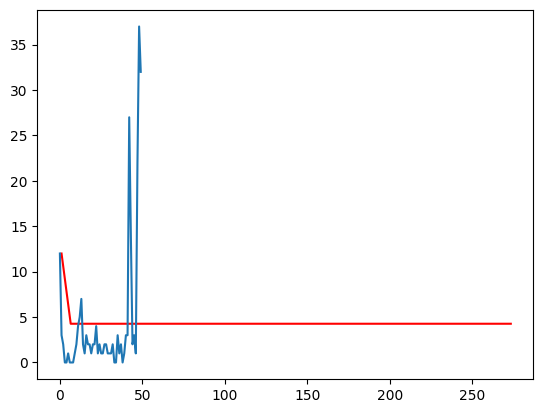

In [113]:
from scipy.optimize import curve_fit as fit

def gaussian(x, a, b, c, x0):
    return a * np.exp(-b * (x-x0)) + c

values = np.array([s[1] for s in sizes if s[1] != -1])
freq, edges = np.histogram(values, bins=50)

xdata = edges[:-1]
ydata = freq

popt, pcov = fit(gaussian, xdata, ydata, p0=np.asarray([50,0.1,0,0]))

plt.plot(xdata, gaussian(xdata, *popt), 'r-')
plt.plot(ydata)

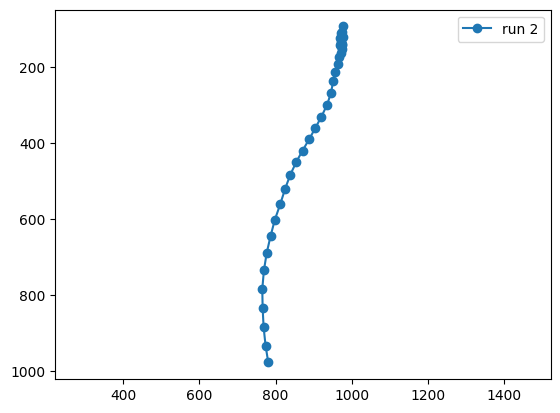

In [178]:
def position(centers, fullRobot):
    pos = [[] for _ in range(0,10)]
    flag = -1
    for i, c in enumerate(centers):
        if fullRobot[i]:
            if fullRobot[i+1] and not fullRobot[i-1]:
                flag += 1
            pos[flag] += [c]
    pos = [p for p in pos if p != []]
    return pos

pos = position(center, robotFull)

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.set_aspect('equal')
ax.axis('equal')
for i in range(len(pos)):
    if i == 1:
        ax.plot([po[0] for po in pos[i]], [po[1] for po in pos[i]], 
                label = 'run {}'.format(i+1),
                marker = 'o')
ax.legend()
plt.show()

array([[ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.22464680e-16],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 7.07092658e-01],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 7.07092658e-01],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 7.07092658e-01],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.74524064e-02],
       [ 1.7

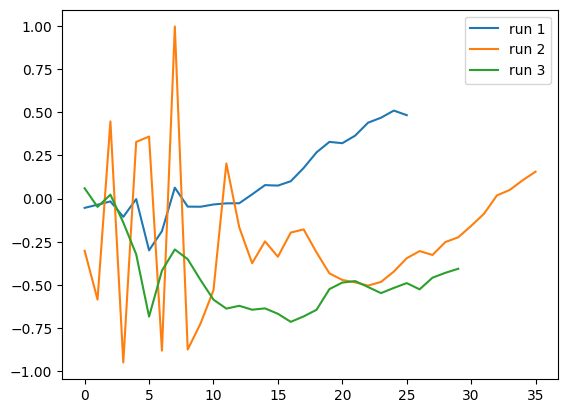

In [176]:
def getSins(pos):
    #Getting Orientation only from position data
    # Get it in radians, the same as the angle data
    sins = [[] for _ in range(len(pos))]
    for j, p in enumerate(pos):
        for i in range(len(p)-1):
            deltax = p[i+1][0] - p[i][0]
            deltay = p[i+1][1] - p[i][1]
            tan = deltax/deltay
            sins[j] += [np.sin(np.arctan(tan))]
    return sins

sins = getSins(pos)

for i, s in enumerate(sins):
    plt.plot(s, label = 'run {}'.format(i+1))
plt.legend()
angles = angle.copy()
for i, a in enumerate(angles):
    if a < 100:
        angles[i] = a + 180

angles = np.array([a*np.pi/180 for a in angles])
np.sin(angles, out=angles)

# indices = [np.where(robotFull[0:400]), np.where(robotFull[400:600]), np.where(robotFull[600:800])]
# angles1 = angles[indices[0]]
# angles2 = angles[400:600][indices[1]]
# angles3 = angles[600:800][indices[2]]
# plt.plot(angles1,label='run 1')
# plt.plot(angles2,label='run 2')
# plt.plot(angles3,label='run 3')
# plt.legend()
# plt.xlabel('frame')
# plt.ylabel('')
# plt.title('Angles of the robot in $\\sin(\\theta)$')